# Práctica 6: Bosques Aleatorios

Inteligencia de Datos

Universidad Iberoamericana Ciudad de México

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow*.

## Bosques Aleatorios

Como discutimos en clase, un Bosque Aleaorio (*Random Forest*) es un ensamble de Árboles de Decisión entrenado, generalmente, bajo el método de Bagging con el parámetro `max_samples` igual al tamaño del conjunto de entrenamiento. En esta práctica, vamos a utilizar la clase `RandomForestClassifier` para entrenar un clasificador con 500 árboles, cada uno limitado a 16 nodos:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

La clase `RandomForest` cuenta con la mayoría de los parámetros de la clase `DecisionTree` para controlar cómo crecen los árboles, además de los hiperparámetros de `BaggingClassifier` para controlar el ensamble. Por lo tanto, deben de dominar ambos métodos para crear buenos modelos basados en Bosques Aleatorios.

El algoritmo de Bosques Aleatorios intriduce aleatoriedad adicional durante el entrenamiento de los árboles: en lugar de buscar la mejor característica para partir un nodo, busca la mejor característica de un subconjunto de características elegidas al azar. De esta manera, el algoritmo genera mayor diversidad en los árboles, disminuyendo la varianza por un mayor sesgo.

## Importancia de las Características

Los Bosques Aleatorios tienen la particularidad de volver fácil la manera de medir la importancia relativa de cada caraterística. Scikit-Learn mide la importancia de cada característica mirando que tanto los nodos de un árbol que usan esa característica reducen, con promedio ponderado, la impureza a través de todos los árboles del bosque.

Scikit-Learn calcula esta medida automáticamente para cada característica después del entrenamiento, para después escalar los resultados de tal manera que la suma de todas las importancias sean igual a 1. Pueden acceder a este resultado mediante la variable `feature_importances_`. El siguiente código entrena un `RandomForestClassifier` en el conjunto de datos Iris y regresa la importancia de cada característica.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [ ]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

**Actividad**: ¿Qué pueden concluir del resultado anterior?

*Su respuesta en esta celda*

De manera similar, si entrenamos un Bosque Aleatorio con el conjunto de datos MNIST, obtenemos la siguiente importancia de cada pixel en las imágenes.

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [ ]:
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = mpl.cm.hot, interpolation="nearest")
  plt.axis("off")

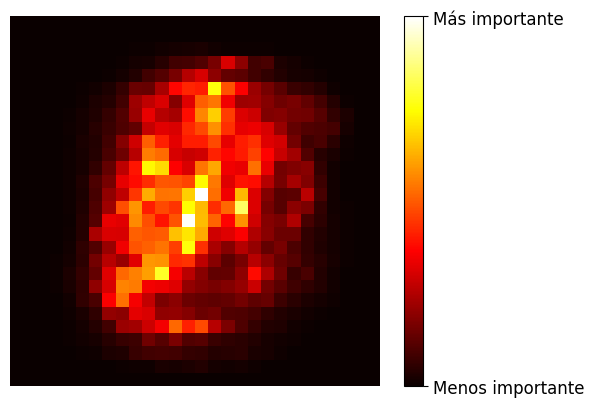

In [ ]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Menos importante', 'Más importante'])

plt.show()

**Actividad**: ¿Qué pueden concluir de la imagen anterior?

*Su respuesta en esta celda*

## Ejercicios

En la práctica mencionamos que un Bosque Aleatorio es equivalente a un modelo de Bagging con Árboles de Decisión. Completar el siguiente código implementando la idea anterior con Bagging y reportar el valor de la última línea. ¿Qué indica este resultado? Cómo modelo base para el modelo de Bagging, usen un árboles de decisión con los mismos parámetros que el Random Forest, además de `max_features='sqrt'`.



```
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest para comparar predicciones
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

# aqui declaren el modelo de Bagging

# y_pred son las predicciones que realiza el modelo de Bagging
np.sum(y_pred == y_pred_rf) / len(y_pred)
```

